# Pandas (продолжение)

In [1]:
import pandas as pd
import numpy as np
print('Егор')

Егор


## Упражнение 1

Найдите и выведи индексы пропущенных значений.
Заполните пропущеные значения следующими способами: 

1) Среднимим значения 
2) Медианными значениями 
3) Наиболее часто встечающимися 
4) Линейной интерполяцией 

In [181]:
df = pd.DataFrame({
'ord_no': [70001, np.nan, 70002, 70004, np.nan, 70005, np.nan, 70010, 70003, 70012, np.nan, 70013],
'purch_amt': [150.5, np.nan, 65.26, 110.5, 948.5, np.nan, 5760, 1983.43, np.nan, 250.45, 75.29, 3045.6],
'sale_amt': [10.5, 20.65, np.nan, 11.5, 98.5, np.nan, 57, 19.43, np.nan, 25.45, 75.29, 35.6],
'ord_date': ['2012-10-05', '2012-09-10', np.nan, '2012-08-17', '2012-09-10', '2012-07-27', '2012-09-10', '2012-10-10', '2012-10-10', '2012-06-27', '2012-08-17', '2012-04-25'],
'customer_id': [3002, 3001, 3001, 3003, 3002, 3001, 3001, 3004, 3003, 3002, 3001, 3001],
'salesman_id': [5002, 5003, 5001,np.nan, 5002, 5001, 5001,np.nan, 5003, 5002, 5003,np.nan]})

In [182]:
# индексы
for col in df.columns:
    mask = pd.isnull(df[col])
    print(col, df[mask][col].index.values)

ord_no [ 1  4  6 10]
purch_amt [1 5 8]
sale_amt [2 5 8]
ord_date [2]
customer_id []
salesman_id [ 3  7 11]


In [163]:
# 1)
f1 = df
for col in df.columns.tolist():
    if f1[col].dtypes != 'object':
        f1[col] = f1[col].fillna(f1[col].mean())
f1

,ord_no,purch_amt,sale_amt,ord_date,customer_id,salesman_id
0,70001.00,150.500000,10.500000,2012-10-05,3002,5002.0
1,70006.25,1376.614444,20.650000,2012-09-10,3001,5003.0
2,70002.00,65.260000,39.324444,NaN,3001,5001.0
3,70004.00,110.500000,11.500000,2012-08-17,3003,5002.0
4,70006.25,948.500000,98.500000,2012-09-10,3002,5002.0
5,70005.00,1376.614444,39.324444,2012-07-27,3001,5001.0
6,70006.25,5760.000000,57.000000,2012-09-10,3001,5001.0
7,70010.00,1983.430000,19.430000,2012-10-10,3004,5002.0
8,70003.00,1376.614444,39.324444,2012-10-10,3003,5003.0
9,70012.00,250.450000,25.450000,2012-06-27,3002,5002.0


In [160]:
# 2)
f2 = df
for col in df.columns.tolist():
    if f2[col].dtypes != 'object':
        f2[col] = f2[col].fillna(f2[col].median())
f2

,ord_no,purch_amt,sale_amt,ord_date,customer_id,salesman_id
0,70001.0,150.50,10.50,2012-10-05,3002,5002.0
1,70004.5,250.45,20.65,2012-09-10,3001,5003.0
2,70002.0,65.26,25.45,NaN,3001,5001.0
3,70004.0,110.50,11.50,2012-08-17,3003,5002.0
4,70004.5,948.50,98.50,2012-09-10,3002,5002.0
5,70005.0,250.45,25.45,2012-07-27,3001,5001.0
6,70004.5,5760.00,57.00,2012-09-10,3001,5001.0
7,70010.0,1983.43,19.43,2012-10-10,3004,5002.0
8,70003.0,250.45,25.45,2012-10-10,3003,5003.0
9,70012.0,250.45,25.45,2012-06-27,3002,5002.0


In [179]:
# 3)
f3 = df
for col in df.columns.tolist():
    if f3[col].dtypes != 'object':
        f3[col] = f3[col].fillna(f3[col].value_counts().idxmax())
f3

,ord_no,purch_amt,sale_amt,ord_date,customer_id,salesman_id
0,70001.0,150.50,10.50,2012-10-05,3002,5002.0
1,70001.0,150.50,20.65,2012-09-10,3001,5003.0
2,70002.0,65.26,10.50,NaN,3001,5001.0
3,70004.0,110.50,11.50,2012-08-17,3003,5002.0
4,70001.0,948.50,98.50,2012-09-10,3002,5002.0
5,70005.0,150.50,10.50,2012-07-27,3001,5001.0
6,70001.0,5760.00,57.00,2012-09-10,3001,5001.0
7,70010.0,1983.43,19.43,2012-10-10,3004,5002.0
8,70003.0,150.50,10.50,2012-10-10,3003,5003.0
9,70012.0,250.45,25.45,2012-06-27,3002,5002.0


In [166]:
# 4)
f4 = df.interpolate()

,ord_no,purch_amt,sale_amt,ord_date,customer_id,salesman_id
0,70001.0,150.50,10.500,2012-10-05,3002,5002.0
1,70001.5,107.88,20.650,2012-09-10,3001,5003.0
2,70002.0,65.26,16.075,NaN,3001,5001.0
3,70004.0,110.50,11.500,2012-08-17,3003,5001.5
4,70004.5,948.50,98.500,2012-09-10,3002,5002.0
5,70005.0,3354.25,77.750,2012-07-27,3001,5001.0
6,70007.5,5760.00,57.000,2012-09-10,3001,5001.0
7,70010.0,1983.43,19.430,2012-10-10,3004,5002.0
8,70003.0,1116.94,22.440,2012-10-10,3003,5003.0
9,70012.0,250.45,25.450,2012-06-27,3002,5002.0


In [188]:
print(df)
mask = pd.isnull(df)

print(mask)
new_df = df[mask]['ord_no']

print(new_df)

     ord_no  purch_amt  sale_amt    ord_date  customer_id  salesman_id
0   70001.0     150.50     10.50  2012-10-05         3002       5002.0
1       NaN        NaN     20.65  2012-09-10         3001       5003.0
2   70002.0      65.26       NaN         NaN         3001       5001.0
3   70004.0     110.50     11.50  2012-08-17         3003          NaN
4       NaN     948.50     98.50  2012-09-10         3002       5002.0
5   70005.0        NaN       NaN  2012-07-27         3001       5001.0
6       NaN    5760.00     57.00  2012-09-10         3001       5001.0
7   70010.0    1983.43     19.43  2012-10-10         3004          NaN
8   70003.0        NaN       NaN  2012-10-10         3003       5003.0
9   70012.0     250.45     25.45  2012-06-27         3002       5002.0
10      NaN      75.29     75.29  2012-08-17         3001       5003.0
11  70013.0    3045.60     35.60  2012-04-25         3001          NaN
    ord_no  purch_amt  sale_amt  ord_date  customer_id  salesman_id
0    Fals

## Упражнение 2


DataFrame дан ниже


1. Найдите все алмазы которые по любому линейному размеру больше 5.

2. Создайте новый DataFrame в которому исключены все не чсиловые столбы исходного DataFrame. 

3. Расчитатйте средние значения для каждого столбца

4. Пострйоет график средних цен для каждой категории (cut) алмазов.

5. Постройте гистрограмму  веса ('carat') алмазов.

6. Посчитаете все пропущенные занчения в Dataframe

7. Создайте новый DataFrame в которому исключены все строки с пропущенными занчениями

8. Узнайте реальное использование оперативной памяти вашим DataFrame

9. Напишите функцию возращающую 20 случайныз строчек из DataFrame (без повторений)

In [267]:
import pandas as pd
diamonds = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv')

diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [212]:
# 1
dx = diamonds['x']>5
dy = diamonds['y']>5
dz = diamonds['z']>5
DIAMONDS = diamonds[dx & dy & dz]
DIAMONDS

,carat,cut,color,clarity,depth,table,price,x,y,z
11778,1.83,Fair,J,I1,70.0,58.0,5083,7.34,7.28,5.12
13002,2.14,Fair,J,I1,69.4,57.0,5405,7.74,7.70,5.36
13118,2.15,Fair,J,I1,65.5,57.0,5430,8.01,7.95,5.23
13562,1.96,Fair,F,I1,66.6,60.0,5554,7.59,7.56,5.04
13757,2.22,Fair,J,I1,66.7,56.0,5607,8.04,8.02,5.36
...,...,...,...,...,...,...,...,...,...,...
27748,2.00,Very Good,G,SI1,63.5,56.0,18818,7.90,7.97,5.04
27749,2.29,Premium,I,VS2,60.8,60.0,18823,8.50,8.47,5.16
48410,0.51,Very Good,E,VS1,61.8,54.7,1970,5.12,5.15,31.80
49189,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,31.80,5.12


In [218]:
# 2
d = pd.DataFrame()
for col in diamonds:
    if diamonds[col].dtype != 'object':
        d[col] = diamonds[col]
d

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [231]:
# 3
d.mean()

carat       0.797940
depth      61.749405
table      57.457184
price    3932.799722
x           5.731157
y           5.734526
z           3.538734
dtype: float64

                 price
cut                   
Fair       4358.757764
Good       3928.864452
Ideal      3457.541970
Premium    4584.257704
Very Good  3981.759891


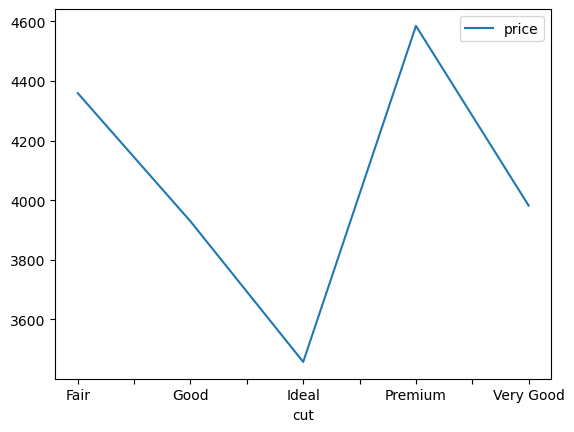

In [239]:
#4
df = diamonds.groupby(['cut']).agg({'price':'mean'})
df.plot()
print(df)

<AxesSubplot:ylabel='Frequency'>

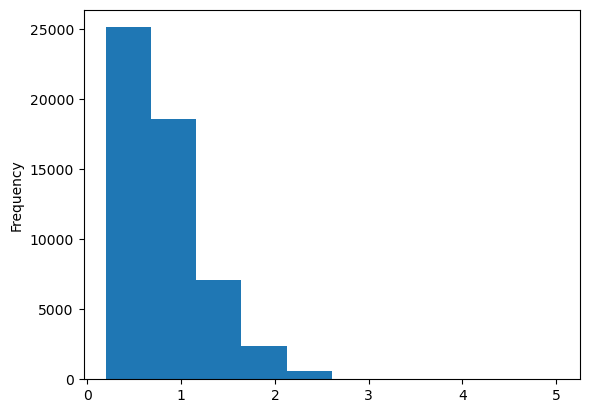

In [251]:
#5
df = diamonds['carat']
df.plot.hist()

In [270]:
#6
diamonds.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [271]:
#7
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [276]:
diamonds.memory_usage().sum()

4315328

In [299]:
diamonds.sample(n = 20)

,carat,cut,color,clarity,depth,table,price,x,y,z
6105,0.90,Very Good,F,SI2,62.0,59.0,3977,6.20,6.10,3.81
45390,0.54,Premium,F,VS2,58.2,60.0,1667,5.39,5.34,3.12
48743,0.76,Good,J,VS1,62.6,61.9,2015,5.70,5.75,3.58
7661,1.01,Very Good,F,SI2,63.4,54.0,4270,6.42,6.39,4.06
35416,0.40,Very Good,G,SI1,60.0,63.0,900,4.80,4.76,2.87
22240,1.08,Ideal,E,VS1,61.7,55.0,10292,6.58,6.61,4.07
46893,0.56,Premium,H,VVS2,59.8,57.0,1814,5.48,5.39,3.25
39457,0.39,Ideal,G,VS1,62.0,55.0,1077,4.71,4.66,2.90
46468,0.63,Premium,E,SI2,58.5,61.0,1775,5.64,5.58,3.28
11742,1.10,Very Good,E,SI2,63.0,56.0,5073,6.59,6.55,4.14


## Упражнение 3
##### ~определенно не баян~ classic

Наконец-то, пришло время взяться за настоящий дата инжениринг и дата саенс. Датасет [титаник](https://www.kaggle.com/c/titanic).

1. Найдите два отдельных распределения по классам и возрастам пассажиров Титаника.
2. Разделите на две возрастные группы такие, что в них входят одинаковое количество пассажиров определенного класса. Определить такие группы для каждого пола (male/female)
3. На основе полученных групп определите доли выживших. (должно получится 6 чисел)
4. Найдите средний возраст выжившего для каждого из полов на основе полного набора данных
5. Найдите несмещенное среднеквадратическое отклонение возраста для выживших
6. Постройте график зависимости доли выживаемости от возроста
7. Постройте куммулятивный график выживаемости в зависимости от возраста для разных полов
8. Определите общие расходы пассажиров
9. Средих всех пассажиров найдите Екатерин (`Kate`, `Katerina`, `Ekaterina` ...)
10. `*`Определите имена для мужчин и женщин, которые чаще остальных встречались на корабле. Выведите список первых пяти.

In [300]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [306]:
# 2

# первая группа
df[df['age']>=df['age'].mean()]
# вторая группа
g2 = df[df['age']<df['age'].mean()]

(     survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
 1           1       1  female  38.0      1      0  71.2833        C  First   
 3           1       1  female  35.0      1      0  53.1000        S  First   
 4           0       3    male  35.0      0      0   8.0500        S  Third   
 6           0       1    male  54.0      0      0  51.8625        S  First   
 11          1       1  female  58.0      0      0  26.5500        S  First   
 ..        ...     ...     ...   ...    ...    ...      ...      ...    ...   
 873         0       3    male  47.0      0      0   9.0000        S  Third   
 879         1       1  female  56.0      0      1  83.1583        C  First   
 881         0       3    male  33.0      0      0   7.8958        S  Third   
 885         0       3  female  39.0      0      5  29.1250        Q  Third   
 890         0       3    male  32.0      0      0   7.7500        Q  Third   
 
        who  adult_male deck  embark_town alive  a

In [310]:
# 4
mean_ages = df.groupby(['who']).agg({'age':'mean'})
mean_ages

,age
who,
child,6.369518
man,33.173123
woman,32.000000


In [312]:
# 5
std_ages_alive = df.groupby(['alive']).agg({'age':'std'})
std_ages_alive

,age
alive,
no,14.172110
yes,14.950952


<AxesSubplot:ylabel='Frequency'>

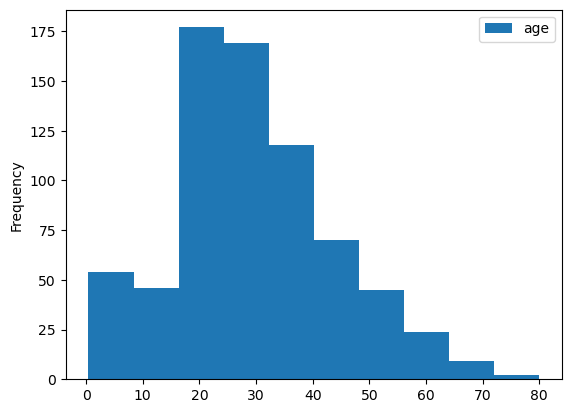

In [330]:
# 6
a = df[['age','alive']]
a.plot.hist()